<a href="https://colab.research.google.com/github/rkuo2000/AI-stocks/blob/main/ch04_stock_index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CH-04 ËÆì AI Ë®àÁÆóÊäÄË°ìÊåáÊ®ôÂèäË≥áÊñôË¶ñË¶∫Âåñ

## 4-1 ÊäÄË°ìÊåáÊ®ôÂÖ¨ÂºèÂ§™Ë§áÈõúÔºüËÆì AI Ëá™ÂãïÂåñË®àÁÆó

### 1Ô∏è‚É£ ÂÆâË£ùÂèäÂåØÂÖ•Â•ó‰ª∂

In [1]:
!pip install openai
!pip install yfinance -U

In [2]:
from  openai import OpenAI, OpenAIError # ‰∏≤Êé• OpenAI API
import yfinance as yf
import pandas as pd # Ë≥áÊñôËôïÁêÜÂ•ó‰ª∂
import numpy as np
import datetime as dt # ÊôÇÈñìÂ•ó‰ª∂

### 2Ô∏è‚É£ ÂèñÂæóËÇ°Á•®Ë≥áÊñô

In [3]:
# Ëº∏ÂÖ•ËÇ°Á•®‰ª£Ëôü
stock_id = "2330.tw"
# ÊäìÂèñÂçäÂπ¥Ë≥áÊñô
end = dt.date.today() # Ë≥áÊñôÁµêÊùüÊôÇÈñì
start = end - dt.timedelta(days=180) # Ë≥áÊñôÈñãÂßãÊôÇÈñì
#df = yf.download(stock_id, start=start, end=end).reset_index()
df = yf.Ticker(stock_id).history(start=start, end=end)
df.tail()

Open    High     Low   Close    Volume  \
Date                                                                  
2025-10-13 00:00:00+08:00  1390.0  1420.0  1390.0  1415.0  53850992   
2025-10-14 00:00:00+08:00  1455.0  1460.0  1420.0  1425.0  39889256   
2025-10-15 00:00:00+08:00  1435.0  1465.0  1425.0  1465.0  41056405   
2025-10-16 00:00:00+08:00  1465.0  1495.0  1465.0  1485.0  37737678   
2025-10-17 00:00:00+08:00  1455.0  1465.0  1450.0  1450.0  38077331   

                           Dividends  Stock Splits  
Date                                                
2025-10-13 00:00:00+08:00        0.0           0.0  
2025-10-14 00:00:00+08:00        0.0           0.0  
2025-10-15 00:00:00+08:00        0.0           0.0  
2025-10-16 00:00:00+08:00        0.0           0.0  
2025-10-17 00:00:00+08:00        0.0           0.0

### 3Ô∏è‚É£ Ëº∏ÂÖ• OpenAI API KEY

In [4]:
from google.colab import userdata

client = OpenAI(
  base_url="https://api.groq.com/openai/v1",
  api_key=userdata.get('GROQ_API_KEY')
)

### 4Ô∏è‚É£ ÂâµÂª∫ GPT-OSS-20B Ê®°ÂûãÂáΩÂºè

In [5]:
model_name = "openai/gpt-oss-20b"

def get_reply(messages):
  try:
    response = client.chat.completions.create(model=model_name,
                         messages=messages)
    reply = response.choices[0].message.content
  except OpenAIError as err:
    reply = f"ÁôºÁîü {err.type} ÈåØË™§\n{err.message}"
  return reply

# Ë®≠ÂÆö AI ËßíËâ≤, ‰ΩøÂÖ∂‰æùÊìö‰ΩøÁî®ËÄÖÈúÄÊ±ÇÈÄ≤Ë°å df ËôïÁêÜ
def ai_helper(df, user_msg):

  msg = [{
    "role":
    "system",
    "content":
    f"As a professional code generation robot, \
      I require your assistance in generating Python code \
      based on specific user requirements. To proceed, \
      I will provide you with a dataframe (df) that follows the \
      format {df.columns}. Your task is to carefully analyze the \
      user's requirements and generate the Python code \
      accordingly.Please note that your response should solely \
      consist of the code itself, \
      and no additional information should be included."
  }, {
    "role":
    "user",
    "content":
    f"The user requirement:{user_msg} \n\
       Your task is to develop a Python function named \
      'calculate(df)'. This function should accept a dataframe as \
      its parameter. Ensure that you only utilize the columns \
      present in the dataset, specifically {df.columns}. \
      After processing, the function should return the processed \
      dataframe. Your response should strictly contain the Python \
      code for the 'calculate(df)' function \
      and exclude any unrelated content."
  }]

  reply_data = get_reply(msg)
  cleaned_code = reply_data.replace("```", "")
  cleaned_code = cleaned_code.replace("python", "")

  return cleaned_code

### ËÆì AI Ëá™ÂãïÁîüÊàêÊäÄË°ìÊåáÊ®ôÁ®ãÂºèÁ¢º

### 5Ô∏è‚É£ Ë®àÁÆóÁßªÂãïÂπ≥ÂùáÁ∑ö

In [6]:
code_str = ai_helper(df, "Ë®àÁÆó8Êó•MAËàá13Êó•MA ")
print(code_str)
exec(code_str)
new_df = calculate(df)
new_df.tail()


import pandas as pd

def calculate(df: pd.DataFrame) -> pd.DataFrame:
    """
    Calculates the 8-day and 13-day simple moving averages of the 'Close' price
    and adds them as new columns 'MA8' and 'MA13' to the dataframe.

    Parameters
    ----------
    df : pd.DataFrame
        DataFrame containing at least the columns:
        ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']

    Returns
    -------
    pd.DataFrame
        The original DataFrame with two additional columns:
        'MA8' and 'MA13'.
    """
    # Ensure the required columns exist
    required_columns = {'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'}
    if not required_columns.issubset(df.columns):
        missing = required_columns - set(df.columns)
        raise ValueError(f"Missing required columns: {missing}")

    # Compute 8-day and 13-day simple moving averages on the 'Close' column
    df['MA8'] = df['Close'].rolling(window=8, min_periods=1).mean()
    d

Open    High     Low   Close    Volume  \
Date                                                                  
2025-10-13 00:00:00+08:00  1390.0  1420.0  1390.0  1415.0  53850992   
2025-10-14 00:00:00+08:00  1455.0  1460.0  1420.0  1425.0  39889256   
2025-10-15 00:00:00+08:00  1435.0  1465.0  1425.0  1465.0  41056405   
2025-10-16 00:00:00+08:00  1465.0  1495.0  1465.0  1485.0  37737678   
2025-10-17 00:00:00+08:00  1455.0  1465.0  1450.0  1450.0  38077331   

                           Dividends  Stock Splits      MA8         MA13  
Date                                                                      
2025-10-13 00:00:00+08:00        0.0           0.0  1387.50  1361.153846  
2025-10-14 00:00:00+08:00        0.0           0.0  1402.50  1371.153846  
2025-10-15 00:00:00+08:00        0.0           0.0  1420.00  1380.769231  
2025-10-16 00:00:00+08:00        0.0           0.0  1435.00  1391.923077  
2025-10-17 00:00:00+08:00        0.0           0.0  1441.25  1401.923077

### 6Ô∏è‚É£ Ë®àÁÆó MACD

In [7]:
code_str = ai_helper(new_df, "ÂÖàË®àÁÆó EMA ÂÜçË®àÁÆó MACD, Ê¨Ñ‰ΩçÂêçÁ®±Áî® MACD_Histogram ÂëΩÂêç")
print(code_str)
exec(code_str)
new_df = calculate(new_df)
new_df.tail()


import pandas as pd

def calculate(df: pd.DataFrame) -> pd.DataFrame:
    """
    Calculate the MACD histogram using EMA12, EMA26, and EMA9 of the MACD line.
    The result is stored in a new column named 'MACD_Histogram'.
    """
    # Ensure 'Close' column exists
    if 'Close' not in df.columns:
        raise KeyError("Input DataFrame must contain a 'Close' column.")

    # Compute EMA12 and EMA26 on the closing price
    df['EMA12'] = df['Close'].ewm(span=12, adjust=False).mean()
    df['EMA26'] = df['Close'].ewm(span=26, adjust=False).mean()

    # MACD line
    df['MACD_line'] = df['EMA12'] - df['EMA26']

    # Signal line: EMA9 of the MACD line
    df['MACD_signal'] = df['MACD_line'].ewm(span=9, adjust=False).mean()

    # Histogram
    df['MACD_Histogram'] = df['MACD_line'] - df['MACD_signal']

    # Optional: drop intermediate EMA columns if not needed
    # df.drop(columns=['EMA12', 'EMA26', 'MACD_line', 'MACD_signal'], inplace=True)

    return df



Open    High     Low   Close    Volume  \
Date                                                                  
2025-10-13 00:00:00+08:00  1390.0  1420.0  1390.0  1415.0  53850992   
2025-10-14 00:00:00+08:00  1455.0  1460.0  1420.0  1425.0  39889256   
2025-10-15 00:00:00+08:00  1435.0  1465.0  1425.0  1465.0  41056405   
2025-10-16 00:00:00+08:00  1465.0  1495.0  1465.0  1485.0  37737678   
2025-10-17 00:00:00+08:00  1455.0  1465.0  1450.0  1450.0  38077331   

                           Dividends  Stock Splits      MA8         MA13  \
Date                                                                       
2025-10-13 00:00:00+08:00        0.0           0.0  1387.50  1361.153846   
2025-10-14 00:00:00+08:00        0.0           0.0  1402.50  1371.153846   
2025-10-15 00:00:00+08:00        0.0           0.0  1420.00  1380.769231   
2025-10-16 00:00:00+08:00        0.0           0.0  1435.00  1391.923077   
2025-10-17 00:00:00+08:00        0.0           0.0  1441.25  1401.923077   

                                 EMA12        EMA26  MACD_line  MACD_signal  \
Date                                                                          
2025-10-13 00:00:00+08:00  1370.679024  1311.738816  58.940207    50.610131   
2025-10-14 00:00:00+08:00  1379.036097  1320.128534  58.907563    52.269618   
2025-10-15 00:00:00+08:00  1392.261313  1330.859753  61.401559    54.096006   
2025-10-16 00:00:00+08:00  1406.528803  1342.277549  64.251254    56.127056   
2025-10-17 00:00:00+08:00  1413.216680  1350.256990  62.959689    57.493582   

                           MACD_Histogram  
Date                                       
2025-10-13 00:00:00+08:00        8.330076  
2025-10-14 00:00:00+08:00        6.637946  
2025-10-15 00:00:00+08:00        7.305553  
2025-10-16 00:00:00+08:00        8.124198  
2025-10-17 00:00:00+08:00        5.466107

### 7Ô∏è‚É£ Ë®àÁÆó RSI

In [8]:
code_str = ai_helper(new_df, "Ë®àÁÆó RSI ")
print(code_str)
exec(code_str)
new_df = calculate(new_df)
new_df.tail()


import pandas as pd

def calculate(df: pd.DataFrame) -> pd.DataFrame:
    """
    Calculate the 14‚Äëperiod RSI for the 'Close' price and add it to the dataframe
    as a new column named 'RSI'.
    
    Parameters
    ----------
    df : pd.DataFrame
        Dataframe containing at least the 'Close' column (plus the other columns listed).
    
    Returns
    -------
    pd.DataFrame
        The input dataframe with an additional 'RSI' column.
    """
    # Ensure 'Close' column exists
    if 'Close' not in df.columns:
        raise KeyError("Input dataframe must contain a 'Close' column.")
    
    # Number of periods for RSI
    period = 14
    
    # Compute price changes
    delta = df['Close'].diff()
    
    # Separate gains and losses
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)
    
    # Compute average gain and loss
    avg_gain = gain.rolling(window=period, min_periods=period).mean()
    avg_loss = loss.rolling(window=period, min_periods=period).mean()
  

Open    High     Low   Close    Volume  \
Date                                                                  
2025-10-13 00:00:00+08:00  1390.0  1420.0  1390.0  1415.0  53850992   
2025-10-14 00:00:00+08:00  1455.0  1460.0  1420.0  1425.0  39889256   
2025-10-15 00:00:00+08:00  1435.0  1465.0  1425.0  1465.0  41056405   
2025-10-16 00:00:00+08:00  1465.0  1495.0  1465.0  1485.0  37737678   
2025-10-17 00:00:00+08:00  1455.0  1465.0  1450.0  1450.0  38077331   

                           Dividends  Stock Splits      MA8         MA13  \
Date                                                                       
2025-10-13 00:00:00+08:00        0.0           0.0  1387.50  1361.153846   
2025-10-14 00:00:00+08:00        0.0           0.0  1402.50  1371.153846   
2025-10-15 00:00:00+08:00        0.0           0.0  1420.00  1380.769231   
2025-10-16 00:00:00+08:00        0.0           0.0  1435.00  1391.923077   
2025-10-17 00:00:00+08:00        0.0           0.0  1441.25  1401.923077   

                                 EMA12        EMA26  MACD_line  MACD_signal  \
Date                                                                          
2025-10-13 00:00:00+08:00  1370.679024  1311.738816  58.940207    50.610131   
2025-10-14 00:00:00+08:00  1379.036097  1320.128534  58.907563    52.269618   
2025-10-15 00:00:00+08:00  1392.261313  1330.859753  61.401559    54.096006   
2025-10-16 00:00:00+08:00  1406.528803  1342.277549  64.251254    56.127056   
2025-10-17 00:00:00+08:00  1413.216680  1350.256990  62.959689    57.493582   

                           MACD_Histogram        RSI  
Date                                                  
2025-10-13 00:00:00+08:00        8.330076  69.117647  
2025-10-14 00:00:00+08:00        6.637946  74.242424  
2025-10-15 00:00:00+08:00        7.305553  75.000000  
2025-10-16 00:00:00+08:00        8.124198  73.015873  
2025-10-17 00:00:00+08:00        5.466107  65.714286

### 8Ô∏è‚É£ Ë®àÁÆóÂ∏ÉÊûóÈÄöÈÅì

In [9]:
code_str = ai_helper(new_df, "Ë´ãË®àÁÆó1.5ÂÄãÊ®ôÊ∫ñÂ∑ÆÁöÑÂ∏ÉÊûóÈÄöÈÅì, Ê¨Ñ‰Ωç‰ª• Upper_Band Âíå Lower_Band ÂëΩÂêç")
print(code_str)
exec(code_str)
new_df = calculate(new_df)
new_df.tail()


import pandas as pd

def calculate(df: pd.DataFrame) -> pd.DataFrame:
    """
    Calculate a 1.5 standard‚Äëdeviation Bollinger Band using the Close price.
    Adds two columns: 'Upper_Band' and 'Lower_Band'.
    """
    # Ensure we are working on a copy to avoid modifying the original dataframe
    df = df.copy()

    # Define the rolling window for Bollinger Bands (commonly 20 periods)
    window = 20

    # Calculate rolling mean and standard deviation of the Close price
    rolling_mean = df['Close'].rolling(window=window, min_periods=1).mean()
    rolling_std = df['Close'].rolling(window=window, min_periods=1).std(ddof=0)

    # Bollinger Band width: 1.5 standard deviations
    band_width = 1.5 * rolling_std

    # Compute Upper and Lower Bands
    df['Upper_Band'] = rolling_mean + band_width
    df['Lower_Band'] = rolling_mean - band_width

    return df



Open    High     Low   Close    Volume  \
Date                                                                  
2025-10-13 00:00:00+08:00  1390.0  1420.0  1390.0  1415.0  53850992   
2025-10-14 00:00:00+08:00  1455.0  1460.0  1420.0  1425.0  39889256   
2025-10-15 00:00:00+08:00  1435.0  1465.0  1425.0  1465.0  41056405   
2025-10-16 00:00:00+08:00  1465.0  1495.0  1465.0  1485.0  37737678   
2025-10-17 00:00:00+08:00  1455.0  1465.0  1450.0  1450.0  38077331   

                           Dividends  Stock Splits      MA8         MA13  \
Date                                                                       
2025-10-13 00:00:00+08:00        0.0           0.0  1387.50  1361.153846   
2025-10-14 00:00:00+08:00        0.0           0.0  1402.50  1371.153846   
2025-10-15 00:00:00+08:00        0.0           0.0  1420.00  1380.769231   
2025-10-16 00:00:00+08:00        0.0           0.0  1435.00  1391.923077   
2025-10-17 00:00:00+08:00        0.0           0.0  1441.25  1401.923077   

                                 EMA12        EMA26  MACD_line  MACD_signal  \
Date                                                                          
2025-10-13 00:00:00+08:00  1370.679024  1311.738816  58.940207    50.610131   
2025-10-14 00:00:00+08:00  1379.036097  1320.128534  58.907563    52.269618   
2025-10-15 00:00:00+08:00  1392.261313  1330.859753  61.401559    54.096006   
2025-10-16 00:00:00+08:00  1406.528803  1342.277549  64.251254    56.127056   
2025-10-17 00:00:00+08:00  1413.216680  1350.256990  62.959689    57.493582   

                           MACD_Histogram        RSI   Upper_Band   Lower_Band  
Date                                                                            
2025-10-13 00:00:00+08:00        8.330076  69.117647  1421.694054  1231.309925  
2025-10-14 00:00:00+08:00        6.637946  74.242424  1430.916668  1241.081343  
2025-10-15 00:00:00+08:00        7.305553  75.000000  1445.973300  1247.026700  
2025-10-16 00:00:00+08:00        8.124198  73.015873  1461.665047  1254.834953  
2025-10-17 00:00:00+08:00        5.466107  65.714286  1470.626354  1262.873646

### 9Ô∏è‚É£ ËÉΩÈáèÊΩÆÊåáÊ®ô (On-Balance Volumem, OBV)

In [10]:
code_str = ai_helper(new_df, "Ë®àÁÆó OBV ÊåáÊ®ô")
print(code_str)
exec(code_str)
new_df = calculate(new_df)
new_df.tail()

import pandas as pd

def calculate(df: pd.DataFrame) -> pd.DataFrame:
    """
    Calculate On‚ÄëBalance Volume (OBV) and add it as a new column to the dataframe.
    """
    # Ensure required columns exist
    if not {'Close', 'Volume'}.issubset(df.columns):
        raise ValueError("DataFrame must contain 'Close' and 'Volume' columns.")
    
    # Compute direction of price movement: +1 if close up, -1 if close down, 0 if unchanged
    price_change = df['Close'].diff()
    direction = price_change.apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))
    
    # OBV is cumulative sum of volume * direction
    df['OBV'] = (direction * df['Volume']).cumsum()
    
    return df


Open    High     Low   Close    Volume  \
Date                                                                  
2025-10-13 00:00:00+08:00  1390.0  1420.0  1390.0  1415.0  53850992   
2025-10-14 00:00:00+08:00  1455.0  1460.0  1420.0  1425.0  39889256   
2025-10-15 00:00:00+08:00  1435.0  1465.0  1425.0  1465.0  41056405   
2025-10-16 00:00:00+08:00  1465.0  1495.0  1465.0  1485.0  37737678   
2025-10-17 00:00:00+08:00  1455.0  1465.0  1450.0  1450.0  38077331   

                           Dividends  Stock Splits      MA8         MA13  \
Date                                                                       
2025-10-13 00:00:00+08:00        0.0           0.0  1387.50  1361.153846   
2025-10-14 00:00:00+08:00        0.0           0.0  1402.50  1371.153846   
2025-10-15 00:00:00+08:00        0.0           0.0  1420.00  1380.769231   
2025-10-16 00:00:00+08:00        0.0           0.0  1435.00  1391.923077   
2025-10-17 00:00:00+08:00        0.0           0.0  1441.25  1401.923077   

                                 EMA12        EMA26  MACD_line  MACD_signal  \
Date                                                                          
2025-10-13 00:00:00+08:00  1370.679024  1311.738816  58.940207    50.610131   
2025-10-14 00:00:00+08:00  1379.036097  1320.128534  58.907563    52.269618   
2025-10-15 00:00:00+08:00  1392.261313  1330.859753  61.401559    54.096006   
2025-10-16 00:00:00+08:00  1406.528803  1342.277549  64.251254    56.127056   
2025-10-17 00:00:00+08:00  1413.216680  1350.256990  62.959689    57.493582   

                           MACD_Histogram        RSI   Upper_Band  \
Date                                                                
2025-10-13 00:00:00+08:00        8.330076  69.117647  1421.694054   
2025-10-14 00:00:00+08:00        6.637946  74.242424  1430.916668   
2025-10-15 00:00:00+08:00        7.305553  75.000000  1445.973300   
2025-10-16 00:00:00+08:00        8.124198  73.015873  1461.665047   
2025-10-17 00:00:00+08:00        5.466107  65.714286  1470.626354   

                            Lower_Band         OBV  
Date                                                
2025-10-13 00:00:00+08:00  1231.309925   918434351  
2025-10-14 00:00:00+08:00  1241.081343   958323607  
2025-10-15 00:00:00+08:00  1247.026700   999380012  
2025-10-16 00:00:00+08:00  1254.834953  1037117690  
2025-10-17 00:00:00+08:00  1262.873646   999040359

### ËÆì AI Ëá™ÂãïÁµ±Êï¥ Dataframe

### üîü Â∞áÊó•È†ªË≥áÊñôËΩâÊèõÊàêÊúàÈ†ªË≥áÊñô

In [11]:
code_str = ai_helper(new_df, "Ë´ãÂ∞áÊó•KÁ∑öÁöÑË≥áÊñôËΩâÊèõÊàêÊúàKÁ∑ö ")
print(code_str)
exec(code_str)
new_df = new_df
df_monthly = new_df
df_monthly = calculate(df_monthly)
df_monthly.tail()

def calculate(df):
    import pandas as pd
    # Ensure the index is a DatetimeIndex for resampling
    if not isinstance(df.index, pd.DatetimeIndex):
        df = df.set_index(pd.to_datetime(df.index))
    # Aggregate daily data into monthly candlesticks
    monthly_df = df.resample('M').agg(
        {
            'Open': 'first',
            'High': 'max',
            'Low': 'min',
            'Close': 'last',
            'Volume': 'sum',
            'Dividends': 'sum',
            'Stock Splits': 'sum',
            'MA8': 'first',
            'MA13': 'first',
            'EMA12': 'first',
            'EMA26': 'first',
            'MACD_line': 'first',
            'MACD_signal': 'first',
            'MACD_Histogram': 'first',
            'RSI': 'first',
            'Upper_Band': 'first',
            'Lower_Band': 'first',
            'OBV': 'first',
        }
    )
    return monthly_df


<string>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.


Open         High          Low        Close  \
Date                                                                            
2025-06-30 00:00:00+08:00   950.151444  1075.697173   938.249756  1055.776855   
2025-07-31 00:00:00+08:00  1075.697167  1160.358497  1060.756905  1155.378418   
2025-08-31 00:00:00+08:00  1125.497948  1195.219116  1120.517869  1155.378418   
2025-09-30 00:00:00+08:00  1145.418282  1355.000000  1140.438180  1305.000000   
2025-10-31 00:00:00+08:00  1325.000000  1495.000000  1325.000000  1450.000000   

                              Volume  Dividends  Stock Splits          MA8  \
Date                                                                         
2025-06-30 00:00:00+08:00  667335366   4.500020           0.0   964.160713   
2025-07-31 00:00:00+08:00  689722354   0.000000           0.0  1057.644371   
2025-08-31 00:00:00+08:00  575596483   0.000000           0.0  1141.060715   
2025-09-30 00:00:00+08:00  621107551   5.000018           0.0  1158.490997   
2025-10-31 00:00:00+08:00  405587013   0.000000           0.0  1311.250000   

                                  MA13        EMA12        EMA26  MACD_line  \
Date                                                                          
2025-06-30 00:00:00+08:00   971.131977   957.945070   938.106659  19.838410   
2025-07-31 00:00:00+08:00  1048.498272  1051.475235  1022.876857  28.598378   
2025-08-31 00:00:00+08:00  1138.522780  1133.689169  1109.564452  24.124717   
2025-09-30 00:00:00+08:00  1161.507784  1160.594953  1151.037173   9.557780   
2025-10-31 00:00:00+08:00  1294.229239  1292.610815  1251.846261  40.764553   

                           MACD_signal  MACD_Histogram        RSI  \
Date                                                                
2025-06-30 00:00:00+08:00    27.091670       -7.253260  45.985413   
2025-07-31 00:00:00+08:00    28.039657        0.558721  54.989811   
2025-08-31 00:00:00+08:00    26.876533       -2.751816  62.499981   
2025-09-30 00:00:00+08:00    13.245274       -3.687494  46.666652   
2025-10-31 00:00:00+08:00    37.802969        2.961585  69.800675   

                            Upper_Band   Lower_Band        OBV  
Date                                                            
2025-06-30 00:00:00+08:00   993.915133   921.066490  122007947  
2025-07-31 00:00:00+08:00  1079.466075   992.469478  431114315  
2025-08-31 00:00:00+08:00  1159.594316  1082.935481  536430196  
2025-09-30 00:00:00+08:00  1191.731990  1133.965191  669173840  
2025-10-31 00:00:00+08:00  1345.020845  1168.652446  857276303

## 4-2 Ë≥áÊñôË¶ñË¶∫Âåñ

### 1Ô∏è‚É£1Ô∏è‚É£ ÂÆâË£ùÂèäÂåØÂÖ•Â•ó‰ª∂

In [12]:
import matplotlib.pyplot as plt

### Áï´Âá∫Á∞°ÊòìËÇ°ÂÉπÂúñ

### 1Ô∏è‚É£2Ô∏è‚É£ ËÆìÊàëÂÄëÂÜç‰∏ÄÊ¨°Ê™¢Ë¶ñË≥áÊñôÊ†ºÂºèÂêßÔºÅ

In [13]:
new_df = new_df.reset_index() # ÈáçË®≠ index
new_df['Date'] = pd.to_datetime(new_df['Date']) # Â∞á Date ËΩâÊèõÁÇ∫ datetime È°ûÂà•
new_df.tail()

Date    Open    High     Low   Close    Volume  \
119 2025-10-13 00:00:00+08:00  1390.0  1420.0  1390.0  1415.0  53850992   
120 2025-10-14 00:00:00+08:00  1455.0  1460.0  1420.0  1425.0  39889256   
121 2025-10-15 00:00:00+08:00  1435.0  1465.0  1425.0  1465.0  41056405   
122 2025-10-16 00:00:00+08:00  1465.0  1495.0  1465.0  1485.0  37737678   
123 2025-10-17 00:00:00+08:00  1455.0  1465.0  1450.0  1450.0  38077331   

     Dividends  Stock Splits      MA8         MA13        EMA12        EMA26  \
119        0.0           0.0  1387.50  1361.153846  1370.679024  1311.738816   
120        0.0           0.0  1402.50  1371.153846  1379.036097  1320.128534   
121        0.0           0.0  1420.00  1380.769231  1392.261313  1330.859753   
122        0.0           0.0  1435.00  1391.923077  1406.528803  1342.277549   
123        0.0           0.0  1441.25  1401.923077  1413.216680  1350.256990   

     MACD_line  MACD_signal  MACD_Histogram        RSI   Upper_Band  \
119  58.940207    50.610131        8.330076  69.117647  1421.694054   
120  58.907563    52.269618        6.637946  74.242424  1430.916668   
121  61.401559    54.096006        7.305553  75.000000  1445.973300   
122  64.251254    56.127056        8.124198  73.015873  1461.665047   
123  62.959689    57.493582        5.466107  65.714286  1470.626354   

      Lower_Band         OBV  
119  1231.309925   918434351  
120  1241.081343   958323607  
121  1247.026700   999380012  
122  1254.834953  1037117690  
123  1262.873646   999040359

### 1Ô∏è‚É£3Ô∏è‚É£ ‰ΩøÁî® matplotlib Áï´Âá∫Êî∂Áõ§ÂÉπÁöÑÊäòÁ∑öÂúñ

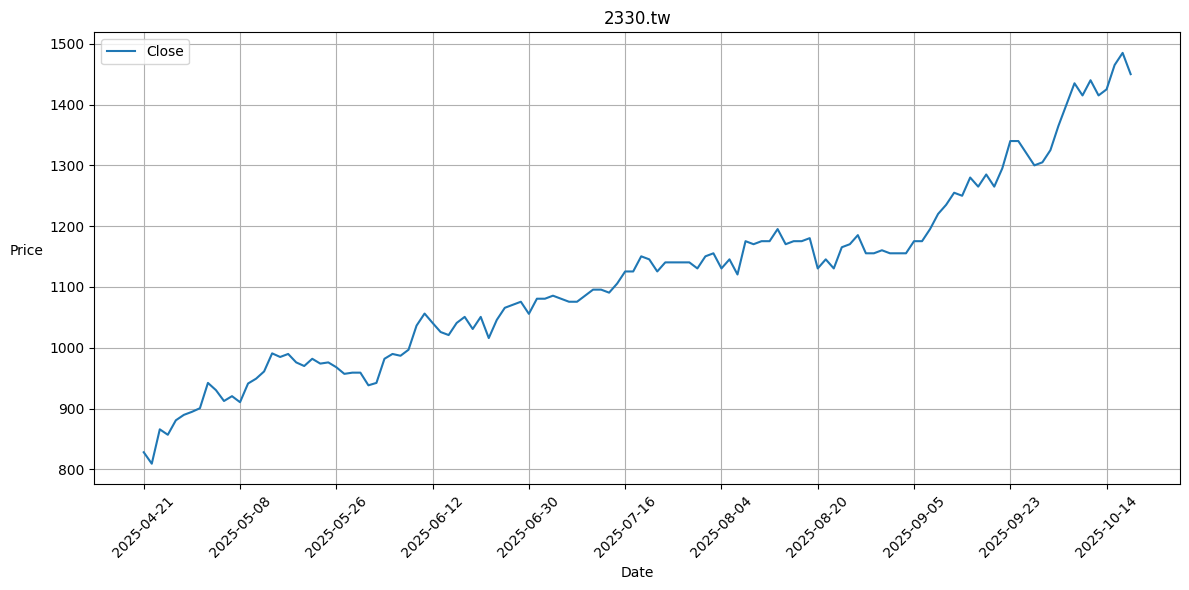

In [14]:
# Áï´Â∏ÉÂ∞∫ÂØ∏Â§ßÂ∞èË®≠ÂÆö
plt.figure(figsize=(12, 6))

# Ë®≠ÂÆöË¶ÅÁπ™Ë£ΩÁöÑË≥áÊñôÊ¨Ñ‰Ωç
plt.plot(new_df['Close'], label='Close')

# Ë®≠ÂÆö x Ëª∏ÁöÑÊôÇÈñì
num = 10
date = new_df["Date"].dt.strftime('%Y-%m-%d')
plt.xticks(date[::len(date)//num].index,
           date[::len(date)//num], rotation = 45)

# Ë®≠ÂÆöÂúñË°®ÁöÑÊ®ôÈ°åÔºåx Ëª∏Âíå y Ëª∏ÁöÑÊ®ôÁ±§
plt.title(f'{stock_id}')   # Â∞áËÇ°Á•®‰ª£ËôüË®≠ÁÇ∫ÂúñÊ®ô
plt.xlabel('Date')         # x Ëª∏Ê®ôÁ±§
plt.ylabel('Price', rotation=0, ha='right')  # y Ëª∏Ê®ôÁ±§
plt.legend(loc='upper left') # Âú®Â∑¶‰∏äËßíÈ°ØÁ§∫Âúñ‰æã
plt.grid(True) # Âú®Âúñ‰∏äÈ°ØÁ§∫Á∂≤Ê†º
plt.tight_layout()

# È°ØÁ§∫ÂúñË°®
plt.show()

### 1Ô∏è‚É£4Ô∏è‚É£ Âä†ÂÖ•Êàê‰∫§Èáè

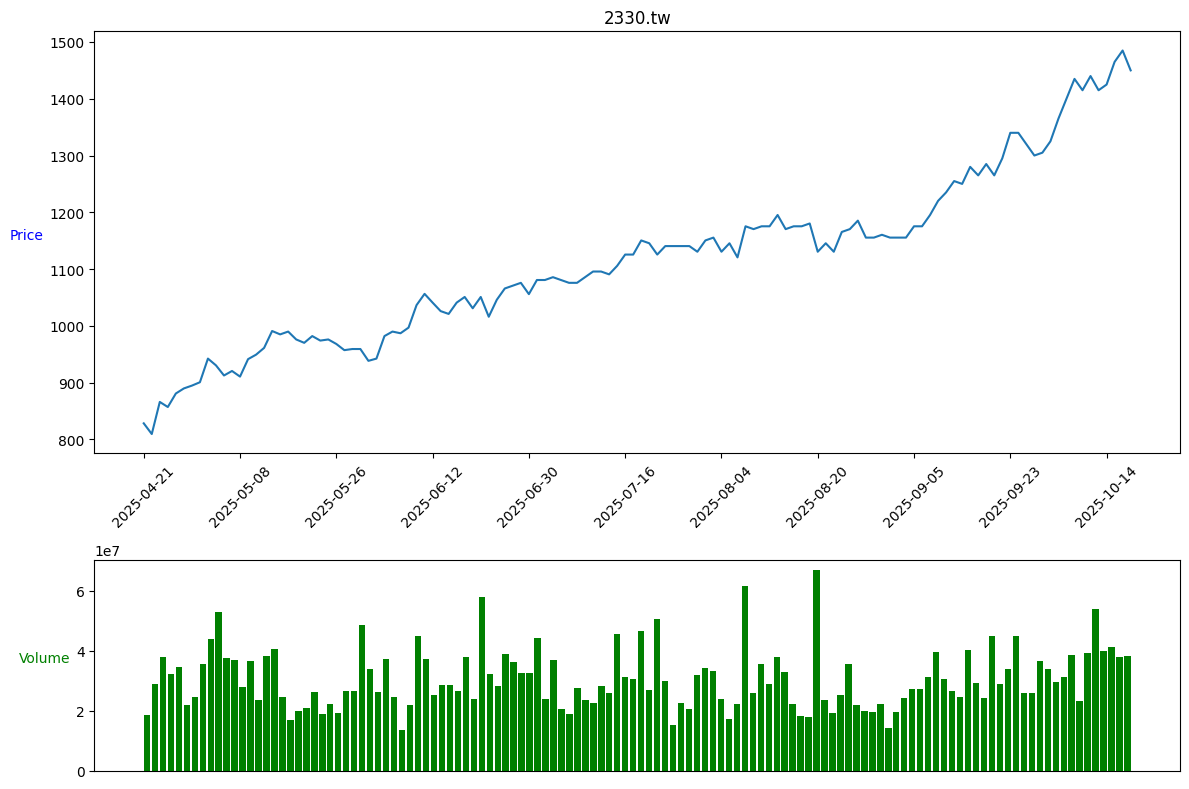

In [15]:
# ÂâµÂª∫ÂÖ©ÂºµÂ≠êÂúñ
fig, (ax1, ax2) = plt.subplots(2, 1,
                figsize=(12, 8),
                gridspec_kw={'height_ratios': [2, 1]})

# Ë®≠ÂÆö x Ëª∏ÊôÇÈñì
num = 10
date = new_df["Date"].dt.strftime('%Y-%m-%d')

# Áπ™Ë£ΩÊî∂Áõ§ÂÉπ
ax1.plot(new_df['Close'], label='Close')
ax1.set_title(f'{stock_id}')
ax1.set_ylabel('Price', color='blue', rotation=0, ha='right')
ax1.set_xticks(date[::len(date)//num].index)
ax1.set_xticklabels(date[::len(date)//num], rotation=45)

# Áπ™Ë£Ω‰∫§ÊòìÈáè
ax2.bar(new_df.index, new_df['Volume'],  color='green')
ax2.set_ylabel('Volume', color='green', rotation=0, ha='right')
ax2.set_xticks([]) # ‰∏çÈ°ØÁ§∫Êó•ÊúüÊ®ôÁ±§
# Ëã•Ë¶ÅÈ°ØÁ§∫ÂúñË°®Ê®ôÁ±§ÂèØ‰ª•‰ΩøÁî®‰ª•‰∏ãÁ®ãÂºèÁ¢º
# ax2.set_xticks(date[::len(date)//num].index)
# ax2.set_xticklabels(date[::len(date)//num], rotation=45)

# ËÆìÂ≠êÂúñÂ°´ÂÖÖ„ÄÅÂ∞çÈΩä
plt.tight_layout()

# È°ØÁ§∫ÂúñË°®
plt.show()


### 1Ô∏è‚É£5Ô∏è‚É£ Âä†ÂÖ•ÊäÄË°ìÊåáÊ®ô

In [16]:
new_df.tail()

Date    Open    High     Low   Close    Volume  \
119 2025-10-13 00:00:00+08:00  1390.0  1420.0  1390.0  1415.0  53850992   
120 2025-10-14 00:00:00+08:00  1455.0  1460.0  1420.0  1425.0  39889256   
121 2025-10-15 00:00:00+08:00  1435.0  1465.0  1425.0  1465.0  41056405   
122 2025-10-16 00:00:00+08:00  1465.0  1495.0  1465.0  1485.0  37737678   
123 2025-10-17 00:00:00+08:00  1455.0  1465.0  1450.0  1450.0  38077331   

     Dividends  Stock Splits      MA8         MA13        EMA12        EMA26  \
119        0.0           0.0  1387.50  1361.153846  1370.679024  1311.738816   
120        0.0           0.0  1402.50  1371.153846  1379.036097  1320.128534   
121        0.0           0.0  1420.00  1380.769231  1392.261313  1330.859753   
122        0.0           0.0  1435.00  1391.923077  1406.528803  1342.277549   
123        0.0           0.0  1441.25  1401.923077  1413.216680  1350.256990   

     MACD_line  MACD_signal  MACD_Histogram        RSI   Upper_Band  \
119  58.940207    50.610131        8.330076  69.117647  1421.694054   
120  58.907563    52.269618        6.637946  74.242424  1430.916668   
121  61.401559    54.096006        7.305553  75.000000  1445.973300   
122  64.251254    56.127056        8.124198  73.015873  1461.665047   
123  62.959689    57.493582        5.466107  65.714286  1470.626354   

      Lower_Band         OBV  
119  1231.309925   918434351  
120  1241.081343   958323607  
121  1247.026700   999380012  
122  1254.834953  1037117690  
123  1262.873646   999040359

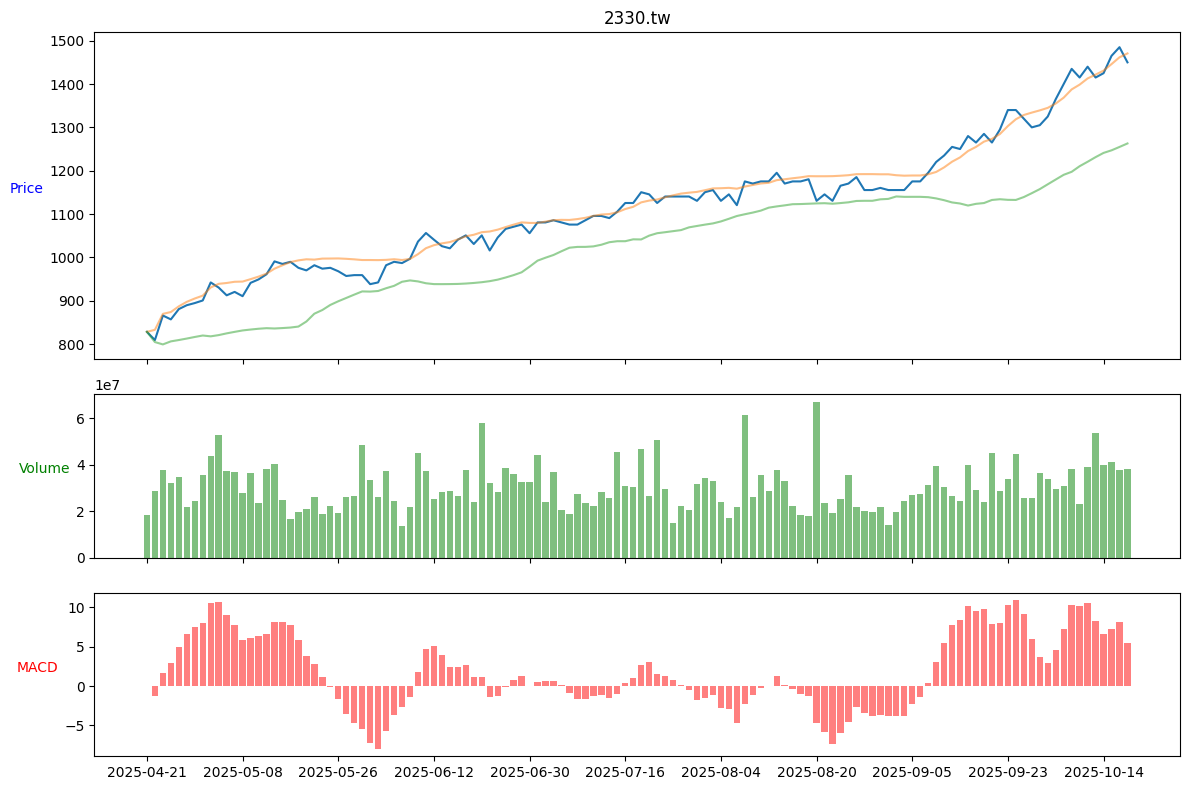

In [17]:
# ÂâµÂª∫‰∏âÂÄãÂ≠êÂúñ
fig, (ax1, ax2, ax3) = plt.subplots(3, 1,
                    figsize=(12, 8),
                    gridspec_kw={'height_ratios': [2, 1, 1]},
                    sharex=True)

# Ë®≠ÂÆö x Ëª∏ÊôÇÈñì
num = 10
date = new_df["Date"].dt.strftime('%Y-%m-%d')

# Áπ™Ë£ΩÊî∂Áõ§ÂÉπ
ax1.plot(new_df['Close'], label='Close')
# Âä†ÂÖ•Â∏ÉÊûóÈÄöÈÅì
ax1.plot(new_df['Upper_Band'], alpha=0.5) # alpha Ë®≠ÂÆöÈÄèÊòéÂ∫¶
ax1.plot(new_df['Lower_Band'], alpha=0.5)
ax1.set_title(f'{stock_id}')
ax1.set_ylabel('Price', color='blue', rotation=0, ha='right')
ax1.set_xticks(date[::len(date)//num].index)
ax1.set_xticklabels(date[::len(date)//num])

# Áπ™Ë£Ω‰∫§ÊòìÈáè
ax2.bar(new_df.index, new_df['Volume'], alpha=0.5, color='green')
ax2.set_ylabel('Volume', color='green', rotation=0, ha='right')

# Áπ™Ë£ΩÊäÄË°ìÊåáÊ®ô
ax3.bar(new_df.index, new_df['MACD_Histogram'], alpha=0.5, color='red')
ax3.set_ylabel('MACD', color='red', rotation=0, ha='right')

# Ë™øÊï¥Â≠êÂúñÈñìÁöÑË∑ùÈõ¢
plt.tight_layout()

# È°ØÁ§∫ÂúñË°®
plt.show()

### Áπ™Ë£Ω K Á∑öÂúñÔºömplfinance

### 1Ô∏è‚É£6Ô∏è‚É£ ÂåØÂÖ•ÊäÄË°ìÂàÜÊûêÁπ™ÂúñÂ•ó‰ª∂

In [18]:
!pip install mplfinance
import mplfinance as mpf

### 1Ô∏è‚É£7Ô∏è‚É£ ÈÅ∏ÊìáË≥áÊñôÊôÇÈñì

In [19]:
kplot_df=new_df.set_index('Date')
#kplot_df = kplot_df['2024-02-01':'2024-07-29']
kplot_df.tail()

Open    High     Low   Close    Volume  \
Date                                                                  
2025-10-13 00:00:00+08:00  1390.0  1420.0  1390.0  1415.0  53850992   
2025-10-14 00:00:00+08:00  1455.0  1460.0  1420.0  1425.0  39889256   
2025-10-15 00:00:00+08:00  1435.0  1465.0  1425.0  1465.0  41056405   
2025-10-16 00:00:00+08:00  1465.0  1495.0  1465.0  1485.0  37737678   
2025-10-17 00:00:00+08:00  1455.0  1465.0  1450.0  1450.0  38077331   

                           Dividends  Stock Splits      MA8         MA13  \
Date                                                                       
2025-10-13 00:00:00+08:00        0.0           0.0  1387.50  1361.153846   
2025-10-14 00:00:00+08:00        0.0           0.0  1402.50  1371.153846   
2025-10-15 00:00:00+08:00        0.0           0.0  1420.00  1380.769231   
2025-10-16 00:00:00+08:00        0.0           0.0  1435.00  1391.923077   
2025-10-17 00:00:00+08:00        0.0           0.0  1441.25  1401.923077   

                                 EMA12        EMA26  MACD_line  MACD_signal  \
Date                                                                          
2025-10-13 00:00:00+08:00  1370.679024  1311.738816  58.940207    50.610131   
2025-10-14 00:00:00+08:00  1379.036097  1320.128534  58.907563    52.269618   
2025-10-15 00:00:00+08:00  1392.261313  1330.859753  61.401559    54.096006   
2025-10-16 00:00:00+08:00  1406.528803  1342.277549  64.251254    56.127056   
2025-10-17 00:00:00+08:00  1413.216680  1350.256990  62.959689    57.493582   

                           MACD_Histogram        RSI   Upper_Band  \
Date                                                                
2025-10-13 00:00:00+08:00        8.330076  69.117647  1421.694054   
2025-10-14 00:00:00+08:00        6.637946  74.242424  1430.916668   
2025-10-15 00:00:00+08:00        7.305553  75.000000  1445.973300   
2025-10-16 00:00:00+08:00        8.124198  73.015873  1461.665047   
2025-10-17 00:00:00+08:00        5.466107  65.714286  1470.626354   

                            Lower_Band         OBV  
Date                                                
2025-10-13 00:00:00+08:00  1231.309925   918434351  
2025-10-14 00:00:00+08:00  1241.081343   958323607  
2025-10-15 00:00:00+08:00  1247.026700   999380012  
2025-10-16 00:00:00+08:00  1254.834953  1037117690  
2025-10-17 00:00:00+08:00  1262.873646   999040359

### 1Ô∏è‚É£8Ô∏è‚É£ Áî® mplfinance Áπ™Ë£Ω K Á∑öÂúñ

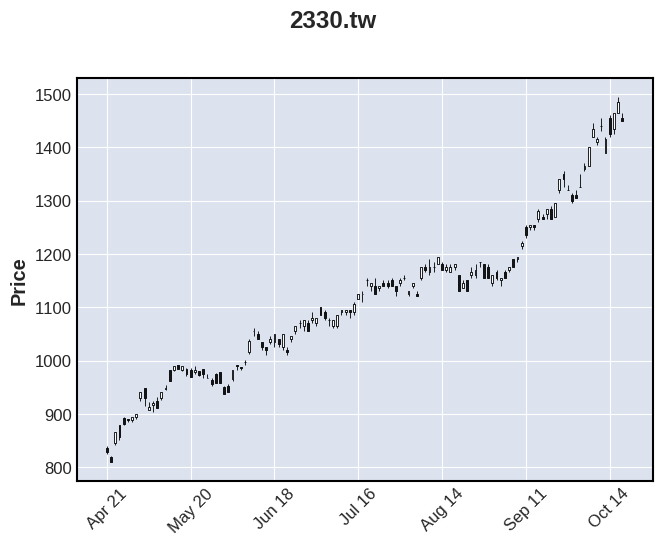

In [20]:
mpf.plot(kplot_df, type='candle', title=f'{stock_id}')

### 1Ô∏è‚É£9Ô∏è‚É£ Âä†ÂÖ•Áπ™ÂúñË®≠ÂÆö

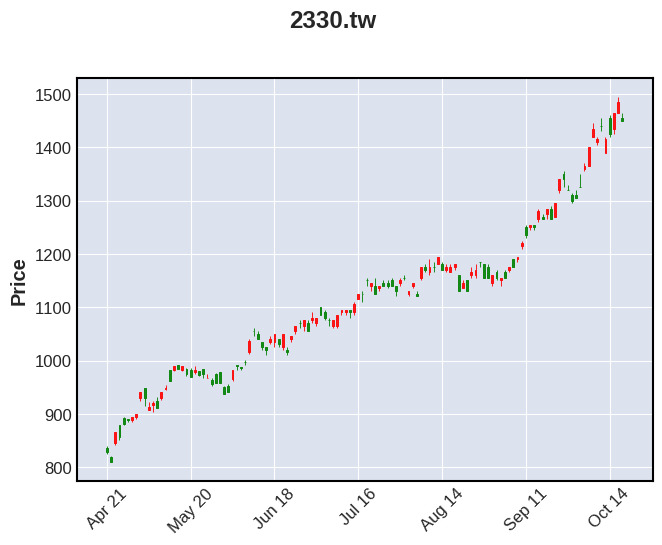

In [21]:
# Ë®≠ÁΩÆÁπ™ÂúñÈ¢®Ê†º
my_color = mpf.make_marketcolors(up='r', down='g', inherit=True)
my_style = mpf.make_mpf_style(base_mpf_style='default',
                marketcolors=my_color)
# ‰ΩøÁî® mplfinance Áπ™Ë£Ω K Á∑öÂúñ
mpf.plot(kplot_df, type='candle',
    style=my_style, title=f'{stock_id}')

### 2Ô∏è‚É£0Ô∏è‚É£ Âä†ÂÖ•Â≠êÂúñ

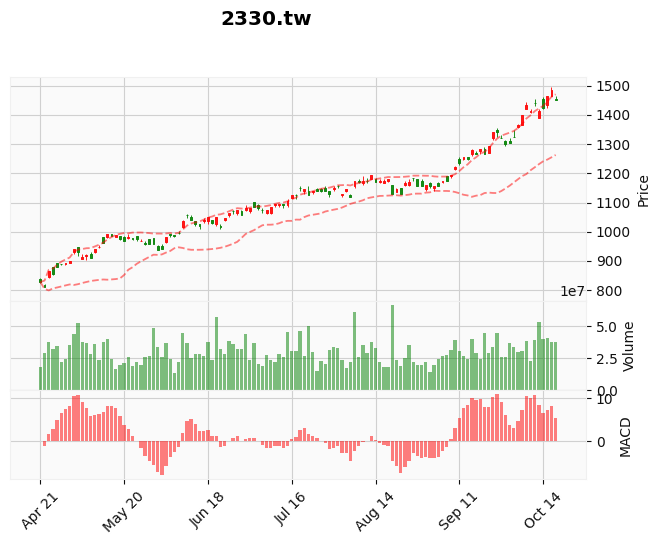

In [22]:
# Ë®≠ÁΩÆÁπ™ÂúñÈ¢®Ê†º
my_color = mpf.make_marketcolors(up='r', down='g', inherit=True)
my_style = mpf.make_mpf_style(base_mpf_style='yahoo',
                marketcolors=my_color)

# ‰∫§ÊòìÈáèÂíåÊäÄË°ìÊåáÊ®ôÂ≠êÂúñ
ap = [
    # ‰∏äËªåÁ∑ö
    mpf.make_addplot(kplot_df['Upper_Band'], color='red',
                      alpha=0.5, linestyle='--'),
    # ‰∏ãËªåÁ∑ö
    mpf.make_addplot(kplot_df['Lower_Band'], color='red',
                     alpha=0.5, linestyle='--'),
    # Êàê‰∫§Èáè
    mpf.make_addplot(kplot_df['Volume'], panel=1, type='bar',
                     color='g', alpha=0.5, ylabel='Volume'),
    # MACD
    mpf.make_addplot(kplot_df['MACD_Histogram'], panel=2, type='bar',
                     color='r', alpha=0.5, ylabel='MACD')
]

# ‰ΩøÁî® mplfinance Áπ™Ë£Ω K Á∑öÂúñ
mpf.plot(kplot_df, type='candle', addplot=ap,
          style=my_style, title=f'{stock_id}')

## 4-3 plotly ‰∫íÂãïÂºèÂúñË°®

### 2Ô∏è‚É£1Ô∏è‚É£ Ê™¢Ë¶ñË≥áÊñô

In [23]:
bk_df = new_df
bk_df.index = bk_df["Date"].dt.strftime('%Y-%m-%d')
bk_df.tail()

Date    Open    High     Low   Close  \
Date                                                                   
2025-10-13 2025-10-13 00:00:00+08:00  1390.0  1420.0  1390.0  1415.0   
2025-10-14 2025-10-14 00:00:00+08:00  1455.0  1460.0  1420.0  1425.0   
2025-10-15 2025-10-15 00:00:00+08:00  1435.0  1465.0  1425.0  1465.0   
2025-10-16 2025-10-16 00:00:00+08:00  1465.0  1495.0  1465.0  1485.0   
2025-10-17 2025-10-17 00:00:00+08:00  1455.0  1465.0  1450.0  1450.0   

              Volume  Dividends  Stock Splits      MA8         MA13  \
Date                                                                  
2025-10-13  53850992        0.0           0.0  1387.50  1361.153846   
2025-10-14  39889256        0.0           0.0  1402.50  1371.153846   
2025-10-15  41056405        0.0           0.0  1420.00  1380.769231   
2025-10-16  37737678        0.0           0.0  1435.00  1391.923077   
2025-10-17  38077331        0.0           0.0  1441.25  1401.923077   

                  EMA12        EMA26  MACD_line  MACD_signal  MACD_Histogram  \
Date                                                                           
2025-10-13  1370.679024  1311.738816  58.940207    50.610131        8.330076   
2025-10-14  1379.036097  1320.128534  58.907563    52.269618        6.637946   
2025-10-15  1392.261313  1330.859753  61.401559    54.096006        7.305553   
2025-10-16  1406.528803  1342.277549  64.251254    56.127056        8.124198   
2025-10-17  1413.216680  1350.256990  62.959689    57.493582        5.466107   

                  RSI   Upper_Band   Lower_Band         OBV  
Date                                                         
2025-10-13  69.117647  1421.694054  1231.309925   918434351  
2025-10-14  74.242424  1430.916668  1241.081343   958323607  
2025-10-15  75.000000  1445.973300  1247.026700   999380012  
2025-10-16  73.015873  1461.665047  1254.834953  1037117690  
2025-10-17  65.714286  1470.626354  1262.873646   999040359

### 2Ô∏è‚É£2Ô∏è‚É£ ÂåØÂÖ• plotly Â•ó‰ª∂

In [24]:
import plotly.graph_objects as go

### 2Ô∏è‚É£3Ô∏è‚É£ Áπ™Ë£Ω‰∫íÂãïÂºè K Á∑öÂúñ

In [25]:
# ÂâµÂª∫ K Á∑öÂúñ
fig = go.Figure(data=[go.Candlestick(x=bk_df.index,
            open=bk_df['Open'],
            high=bk_df['High'],
            low=bk_df['Low'],
            close=bk_df['Close'],
            increasing_line_color='red',
            decreasing_line_color='green')])

# Ë™øÊï¥ÂØ¨È´ò
fig.update_layout(
    height=800,
    width=1200
)

# È°ØÁ§∫ÂúñË°®
fig.show()

### 2Ô∏è‚É£4Ô∏è‚É£ ÁßªÈô§Èùû‰∫§ÊòìÊó•Á©∫ÂÄº
Ëß£Ê±∫Áπ™Âúñ‰∏çÈÄ£Á∫åÂïèÈ°å

In [26]:
# ÂâµÂª∫ K Á∑öÂúñ
fig = go.Figure(data=[go.Candlestick(x=bk_df.index,
            open=bk_df['Open'],
            high=bk_df['High'],
            low=bk_df['Low'],
            close=bk_df['Close'],
            increasing_line_color='red',
            decreasing_line_color='green')])

# Ë™øÊï¥ÂØ¨È´ò
fig.update_layout(
    height=800,
    width=1200
)

# ÁßªÈô§Èùû‰∫§ÊòìÊó•Á©∫ÂÄº
# ÁîüÊàêË©≤Êó•ÊúüÁØÑÂúçÂÖßÁöÑÊâÄÊúâÊó•Êúü
all_dates = pd.date_range(start=bk_df.index.min(),
              end=bk_df.index.max())
# ÊâæÂá∫‰∏çÂú®Ë≥áÊñô‰∏≠ÁöÑÊó•Êúü
breaks = all_dates[~all_dates.isin(bk_df.index)]
dt_breaks = breaks.tolist() # ËΩâÊèõÊàêÂàóË°®
fig.update_xaxes(rangebreaks=[{'values': dt_breaks}])

# È°ØÁ§∫ÂúñË°®
fig.show()

/tmp/ipython-input-1835360458.py:21: FutureWarning:

The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.



### 2Ô∏è‚É£5Ô∏è‚É£ Âä†ÂÖ•Êá∏ÂÅúÂçÅÂ≠óËª∏

In [27]:
# ÂâµÂª∫ K Á∑öÂúñ
fig = go.Figure(data=[go.Candlestick(x=bk_df.index,
            open=bk_df['Open'],
            high=bk_df['High'],
            low=bk_df['Low'],
            close=bk_df['Close'],
            increasing_line_color='red',
            decreasing_line_color='green')])


# ÂúñË°®Êõ¥Êñ∞-Âä†ÂÖ•Êá∏ÂÅúÂçÅÂ≠óËª∏
fig.update_xaxes(showspikes=True, spikecolor="gray",
                 spikemode="across")
fig.update_yaxes(showspikes=True, spikecolor="gray",
                 spikemode="across")
fig.update_layout(
    height=800,
    width=1200
)


# ÁßªÈô§Èùû‰∫§ÊòìÊó•Á©∫ÂÄº
all_dates = pd.date_range(start=bk_df.index.min(), end=bk_df.index.max()) # ÁîüÊàêË©≤Êó•ÊúüÁØÑÂúçÂÖßÁöÑÊâÄÊúâÊó•Êúü
breaks = all_dates[~all_dates.isin(bk_df.index)] # ÊâæÂá∫‰∏çÂú®Ë≥áÊñô‰∏≠ÁöÑÊó•Êúü
dt_breaks = breaks.tolist() # ËΩâÊèõÊàêÂàóË°®
fig.update_xaxes(rangebreaks=[{'values': dt_breaks}])

fig.show()

/tmp/ipython-input-3746432464.py:24: FutureWarning:

The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.



### 2Ô∏è‚É£6Ô∏è‚É£ Âä†ÂÖ•ÊäÄË°ìÊåáÊ®ô

In [28]:
# ÂâµÂª∫ K Á∑öÂúñ
fig = go.Figure(data=[go.Candlestick(x=bk_df.index,
            open=bk_df['Open'],
            high=bk_df['High'],
            low=bk_df['Low'],
            close=bk_df['Close'],
            increasing_line_color='red', decreasing_line_color='green',
            name = "K Á∑ö")])


# Â∏ÉÊûóÈÄöÈÅì
fig.add_trace(go.Scatter(
    x=bk_df.index, y=bk_df['Upper_Band'],mode='lines',
    line={'color': 'green','dash': 'dash'},name = "‰∏äËªåÁ∑ö"))
fig.add_trace(go.Scatter(
    x=bk_df.index, y=bk_df['Lower_Band'], mode='lines',
    line={'color': 'green', 'dash': 'dash'},name = "‰∏ãËªåÁ∑ö"))

# ‰∫§ÊòìÈáè
fig.add_trace(go.Bar(
    x=bk_df.index, y=bk_df['Volume'], marker={'color': 'green'},
      yaxis='y2', name = "‰∫§ÊòìÈáè"))

# MACD
fig.add_trace(go.Bar(
    x=bk_df.index, y=bk_df['MACD_Histogram'], marker={'color': 'red'},
      yaxis='y3', name = "MACD"))

# Âä†ÂÖ•Êá∏ÂÅúÂçÅÂ≠óËª∏
fig.update_xaxes(showspikes=True, spikecolor="gray",
                 spikemode="toaxis")
fig.update_yaxes(showspikes=True, spikecolor="gray",
                 spikemode="across")

# Êõ¥Êñ∞Áï´Â∏ÉÂ§ßÂ∞è‰∏¶Â¢ûÂä†ÁØÑÂúçÈÅ∏Êìá
fig.update_layout(
    height=800,
    yaxis={'domain': [0.35, 1]},
    yaxis2={'domain': [0.15, 0.3]},
    yaxis3={'domain': [0, 0.15]},
    title=f"{stock_id}",
    xaxis={
        # ÁØÑÂúçÈÅ∏ÊìáÊ†º
        'rangeselector': {
            'buttons': [
                {'count': 1, 'label': '1M',
                  'step': 'month', 'stepmode': 'backward'},
                {'count': 6, 'label': '6M',
                  'step': 'month', 'stepmode': 'backward'},
                {'count': 1, 'label': '1Y',
                  'step': 'year', 'stepmode': 'backward'},
                {'step': 'all'}
            ]
        },
        # ÁØÑÂúçÊªëÂãïÊ¢ù
        'rangeslider': {
            'visible': True,
            # ÊªëÂãïÊ¢ùÁöÑÈ´òÂ∫¶ (Ë®≠ÁΩÆ 0.01 Â∞±ÊúÉËÆäÂñÆÁ¥îÁöÑ bar)
            'thickness': 0.01,
            'bgcolor': "#E4E4E4"  # ËÉåÊôØËâ≤
        },
        'type': 'date'
    }
)


# ÁßªÈô§Èùû‰∫§ÊòìÊó•Á©∫ÂÄº
all_dates = pd.date_range(start=bk_df.index.min(), end=bk_df.index.max()) # ÁîüÊàêË©≤Êó•ÊúüÁØÑÂúçÂÖßÁöÑÊâÄÊúâÊó•Êúü
breaks = all_dates[~all_dates.isin(bk_df.index)] # ÊâæÂá∫‰∏çÂú®Ë≥áÊñô‰∏≠ÁöÑÊó•Êúü
dt_breaks = breaks.tolist() # ËΩâÊèõÊàêÂàóË°®
fig.update_xaxes(rangebreaks=[{'values': dt_breaks}])

fig.show()

/tmp/ipython-input-3180122684.py:69: FutureWarning:

The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.



### 2Ô∏è‚É£7Ô∏è‚É£ ÂØ´ÊàêÂáΩÂºè

In [29]:
# ‰∏ãËºâË≥áÊñô‰∏¶ËÆì AI Ë®àÁÆóÊåáÊ®ô
def download_stock_data(stock_id, start=None,
                        end=None, indicator='MACD'):
    stock_id = f"{stock_id}.tw"
    if not end:
        end = dt.date.today()
    if not start:
        start = end - dt.timedelta(days=365)
    # Âæû yf ‰∏ãËºâË≥áÊñô
    #df = yf.download(stock_id, start=start, end=end).reset_index()
    df = yf.Ticker(stock_id).history(start=start, end=end)

    # AI Ë®àÁÆóÊäÄË°ìÊåáÊ®ô
    code_str = ai_helper(df, f"Ë®àÁÆó{indicator}")
    print(code_str)

    # Â∞á exec ÁîüÊàêÁöÑ calculate Ë®≠ÁÇ∫Â±ÄÈÉ®ËÆäÊï∏
    local_vars = {}
    exec(code_str, globals(), local_vars)
    calculate = local_vars['calculate']

    df = calculate(df)

    # Ë≥áÊñôËôïÁêÜ
    bk_df = df.reset_index()
    bk_df.index = bk_df["Date"].dt.strftime('%Y-%m-%d')

    return bk_df

# Áπ™Ë£ΩÂúñË°®ÂáΩÂºè
def create_stock_figure(stock_id, bk_df):

    # ÂâµÂª∫ K Á∑öÂúñ
    fig = go.Figure(data=[go.Candlestick(x=bk_df.index,
                        open=bk_df['Open'],
                        high=bk_df['High'],
                        low=bk_df['Low'],
                        close=bk_df['Close'],
                        increasing_line_color='red',
                        decreasing_line_color='green',
                        name = "K Á∑ö")])

    # ‰∫§ÊòìÈáè
    fig.add_trace(go.Bar(x=bk_df.index, y=bk_df['Volume'],
                         marker={'color': 'green'}, yaxis='y2',
                           name = "‰∫§ÊòìÈáè"))

    # ÊâæÂá∫ÈúÄË¶ÅÁπ™Ë£ΩÁöÑÊ¨Ñ‰Ωç
    columns = bk_df.columns
    exclude_columns = ['index','Date', 'Open', 'High',
                        'Low', 'Close', 'Adj Close', 'Volume']
    remain_columns = [col for col in columns if
                       col not in exclude_columns]
    min_close = bk_df['Close'].min() - bk_df['Close'].std()
    max_close = bk_df['Close'].max() + bk_df['Close'].std()
    # Áπ™Ë£ΩÊäÄË°ìÊåáÊ®ô
    for i in remain_columns:
      if min_close <= bk_df[i].mean() <= max_close:
        fig.add_trace(go.Scatter(x=bk_df.index, y=bk_df[i],
                                  mode='lines', name=i))
      else:
        fig.add_trace(go.Scatter(x=bk_df.index, y=bk_df[i],
                                  mode='lines', yaxis='y3', name=i))

    # Âä†ÂÖ•Êá∏ÂÅúÂçÅÂ≠óËª∏
    fig.update_xaxes(showspikes=True, spikecolor="gray",
                    spikemode="toaxis")
    fig.update_yaxes(showspikes=True, spikecolor="gray",
                    spikemode="across")
    # Êõ¥Êñ∞Áï´Â∏ÉÂ§ßÂ∞è‰∏¶Â¢ûÂä†ÁØÑÂúçÈÅ∏Êìá
    fig.update_layout(
        height=800,
        width=1200,
        yaxis={'domain': [0.35, 1]},
        yaxis2={'domain': [0.15, 0.3]},
        # Ëã•Ë¶ÅÈáçÁñä y1 Âíå y3, ÂèØ‰ª•ÊîπÊàê
        # yaxis3=dict(overlaying='y', side='right')
        yaxis3={'domain': [0, 0.15]},
        title=f"{stock_id}",
        xaxis={
            # ÁØÑÂúçÈÅ∏ÊìáÊ†º
            'rangeselector': {
                'buttons': [
                    {'count': 1, 'label': '1M',
                      'step': 'month', 'stepmode': 'backward'},
                    {'count': 6, 'label': '6M',
                      'step': 'month', 'stepmode': 'backward'},
                    {'count': 1, 'label': '1Y',
                      'step': 'year', 'stepmode': 'backward'},
                    {'step': 'all'}
                ]
            },
            # ÁØÑÂúçÊªëÂãïÊ¢ù
            'rangeslider': {
                'visible': True,
                'thickness': 0.01,  # ÊªëÂãïÊ¢ùÁöÑÈ´òÂ∫¶
                'bgcolor': "#E4E4E4"  # ËÉåÊôØËâ≤
            },
            'type': 'date'
        }
    )

    # ÁßªÈô§Èùû‰∫§ÊòìÊó•Á©∫ÂÄº
    # ÁîüÊàêË©≤Êó•ÊúüÁØÑÂúçÂÖßÁöÑÊâÄÊúâÊó•Êúü
    all_dates = pd.date_range(start=bk_df.index.min(),
                               end=bk_df.index.max())
    # ÊâæÂá∫‰∏çÂú®Ë≥áÊñô‰∏≠ÁöÑÊó•Êúü
    breaks = all_dates[~all_dates.isin(bk_df.index)]
    dt_breaks = breaks.tolist() # ËΩâÊèõÊàêÂàóË°®Ê†ºÂºè
    fig.update_xaxes(rangebreaks=[{'values': dt_breaks}])

    return fig

# ‰∏ªÂáΩÂºè
def plotly_stock(stock_id, start=None, end=None, indicator='MACD'):

    df = download_stock_data(stock_id, start, end, indicator)
    fig = create_stock_figure(stock_id,df)
    fig.show()

### 2Ô∏è‚É£8Ô∏è‚É£ Âü∑Ë°åÂáΩÂºè

In [30]:
plotly_stock("2454", start='2022-01-01', end= None, indicator='Â∏ÉÊûóÈÄöÈÅìÂèäMACD')


import pandas as pd

def calculate(df: pd.DataFrame) -> pd.DataFrame:
    """
    Calculate Bollinger Bands and MACD for the given DataFrame.

    Parameters
    ----------
    df : pd.DataFrame
        DataFrame containing columns ['Open', 'High', 'Low', 'Close',
        'Volume', 'Dividends', 'Stock Splits'].

    Returns
    -------
    pd.DataFrame
        The original DataFrame augmented with Bollinger Band and MACD
        related columns.
    """
    # Bollinger Bands (20‚Äëperiod, 2‚Äësigma)
    period_bb = 20
    df['BB_middle'] = df['Close'].rolling(window=period_bb, min_periods=1).mean()
    df['BB_std'] = df['Close'].rolling(window=period_bb, min_periods=1).std()
    df['BB_upper'] = df['BB_middle'] + 2 * df['BB_std']
    df['BB_lower'] = df['BB_middle'] - 2 * df['BB_std']

    # MACD (12‚Äëperiod EMA minus 26‚Äëperiod EMA)
    df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
    df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = df['

/tmp/ipython-input-2562460760.py:108: FutureWarning:

The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.

